Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [19]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [20]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [21]:
movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 
               'production_companies', 'original_title', 'title'], axis=1, inplace=True)

In [22]:
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124


In [23]:
list(movies_df.columns)

['budget',
 'genres',
 'id',
 'popularity',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'vote_average',
 'vote_count']

#### Remove any duplicate rows

In [24]:
# occurrence based on id column
duplicate = movies_df[movies_df.duplicated('id')]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

"""No Duplicate rows found according to ID."""

Duplicate Rows :


'No Duplicate rows found according to ID.'

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [25]:

# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 11)

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [26]:
# Change the release_date column to DateTime column

movies_df.release_date = pd.to_datetime(movies_df['release_date'])


# Extract the release year from every release date

movies_df['release_year'] = movies_df['release_date'].dt.year
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [27]:
# Changing the data type of the below mentioned columns and 
change_cols=['budget', 'revenue']
#changing data type
movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
vote_average                   float64
vote_count                       int64
release_year                     int64
dtype: object

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [28]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
#parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [29]:
expensive_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
expensive_movies_df



,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",6.4,4948,2011
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],6.9,4500,2007
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],7.3,6767,2015
10,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",5.4,1400,2006
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],6.1,2124,2012


In [30]:

def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 movies dataframe in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df = pd.DataFrame(movies_df.loc[top])
    
    bottom = movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name..."
id,1865,3082
popularity,135.413856,28.27648
production_countries,['United States of America'],['United States of America']
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136.0,87.0
spoken_languages,"['English', 'Español']",['English']
vote_average,6.4,8.1


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [31]:

# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
cols = ['budget',
         'profit',
         'revenue',
         'genres',
         'id',
         'popularity',
         'production_countries',
        'release_date',
         'runtime',
         'spoken_languages',
         'vote_average',
         'vote_count']
movies_df = movies_df[cols]
movies_df.sort_values(by = ['profit'], ascending=False).head()




,budget,profit,revenue,genres,id,popularity,production_countries,release_date,runtime,spoken_languages,vote_average,vote_count
0,237000000,2550965087,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,162.0,"['English', 'Español']",7.2,11800
25,200000000,1645034188,1845034188,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",597,100.025899,['United States of America'],1997-11-18,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",7.5,7562
28,150000000,1363528810,1513528810,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",135397,418.708552,['United States of America'],2015-06-09,124.0,['English'],6.5,8662
44,190000000,1316249360,1506249360,"[{""id"": 28, ""name"": ""Action""}]",168259,102.322217,"['Japan', 'United States of America']",2015-04-01,137.0,['English'],7.3,4176
16,220000000,1299557910,1519557910,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",24428,144.448633,['United States of America'],2012-04-25,143.0,['English'],7.4,11776


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [32]:
popular_movies_df = movies_df.sort_values(by ='popularity', ascending=False).head()
popular_movies_df.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,runtime,spoken_languages,vote_average,vote_count
546,74000000,1082730962,1156730962,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",211672,875.581305,['United States of America'],2015-06-17,91.0,['English'],6.4,4571
95,165000000,510120017,675120017,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,169.0,['English'],8.1,10867
788,58000000,725112979,783112979,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",293660,514.569956,['United States of America'],2016-02-09,108.0,['English'],7.4,10995
94,170000000,603328629,773328629,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,121.0,['English'],7.9,9742
127,150000000,228858340,378858340,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,120.0,['English'],7.2,9427


#### Find Movies which are rated above 7



In [33]:
movies_df[movies_df['vote_average'] >= 7.0]


,budget,profit,revenue,genres,id,popularity,production_countries,release_date,runtime,spoken_languages,vote_average,vote_count
0,237000000,2550965087,2787965087,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,162.0,"['English', 'Español']",7.2,11800
3,250000000,834939099,1084939099,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,['United States of America'],2012-07-16,165.0,['English'],7.6,9106
6,260000000,331794936,591794936,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,['United States of America'],2010-11-24,100.0,['English'],7.4,3330
7,280000000,1125403694,1405403694,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,['United States of America'],2015-04-22,141.0,['English'],7.3,6767
8,250000000,683959197,933959197,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,153.0,['English'],7.4,5293
...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,6546368,6706368,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 36,...",1779,3.284903,['United States of America'],1989-09-01,91.0,['English'],7.4,90
4724,10000,6990000,7000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...",985,20.399578,['United States of America'],1977-03-19,89.0,['English'],7.5,485
4738,60000,3161152,3221152,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",473,27.788067,['United States of America'],1998-07-10,84.0,['English'],7.1,586
4773,27000,3124130,3151130,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,['United States of America'],1994-09-13,92.0,['English'],7.4,755


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

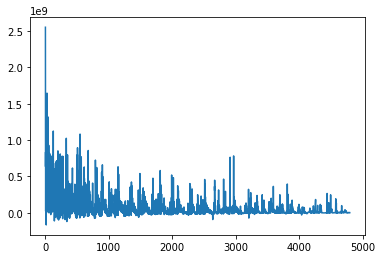

In [39]:
"""To find the year in which we had the most number of profitable movies, we used idxmax method :"""

# Most profitable year from the given dataset.
profits_year = movies_df['revenue'] - movies_df['budget']
plt.plot(profits_year)

# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.






#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [ ]:
# formatting the data in the genres columns.
movies_df['genres']=movies_df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_df['genres']=movies_df['genres'].str.split(',')
movies_df.head()

,budget,profit,revenue,genres,id,popularity,production_countries,release_date,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,2550965087,2787965087,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.0,"['English', 'Español']",Avatar,7.2,11800
1,300000000,661000000,961000000,"[Adventure, Fantasy, Action]",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,635674609,880674609,"[Action, Adventure, Crime]",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466
3,250000000,834939099,1084939099,"[Action, Crime, Drama, Thriller]",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.0,['English'],The Dark Knight Rises,7.6,9106
4,260000000,24139100,284139100,"[Action, Adventure, ScienceFiction]",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0,['English'],John Carter,6.1,2124


<AxesSubplot:>

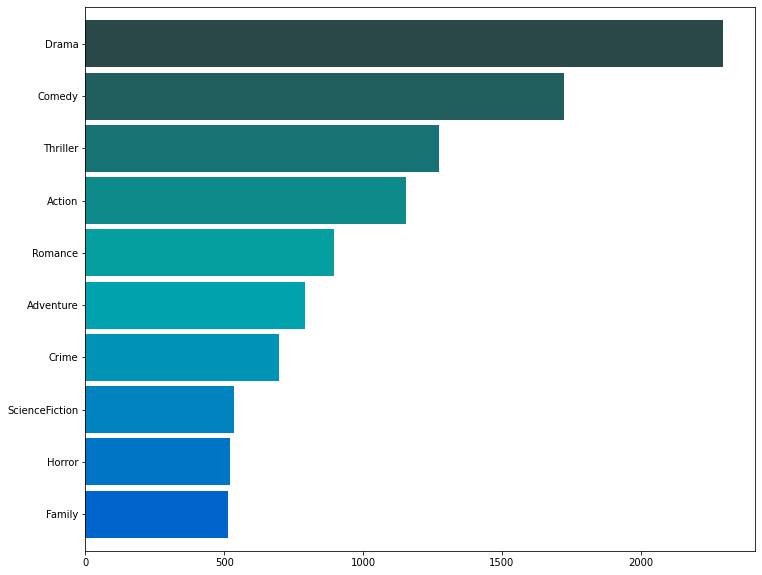

In [ ]:

plt.subplots(figsize=(12,10))
list1=[]

# extending the list of genres to collect all the genres of all the profitable movies
for i in movies_df['genres']:
    list1.extend(i)

    
genre_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)

ax = genre_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('winter_d',10))

ax

In [ ]:
# formatting the data in the Spoken Languages columns.
movies_df['spoken_languages']=movies_df['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_df['spoken_languages']=movies_df['spoken_languages'].str.split(',')
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[English, Español]",7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,[English],6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,[English],7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,[English],6.1,2124,2012


<AxesSubplot:>

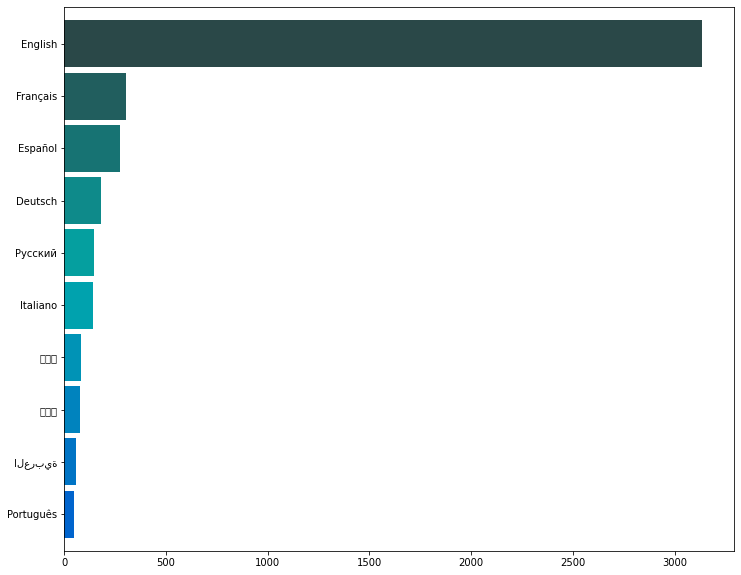

In [ ]:

plt.subplots(figsize=(12,10))
list1=[]

for i in movies_df['spoken_languages']:
    list1.extend(i)

    
lang_count_series = pd.Series(list1).value_counts()[:10].sort_values(ascending=True)

ax = lang_count_series.plot.barh(
    width=0.9,
    color=sns.color_palette('winter_d',10))

ax

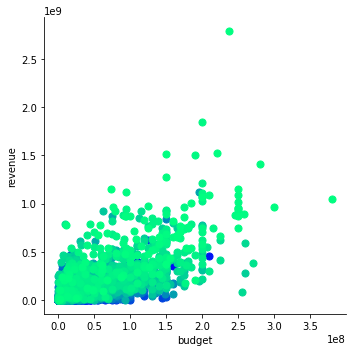

In [35]:
sns.lmplot('budget', 'revenue', data=movies_df, hue='popularity', palette='winter', x_bins=3, legend=False);

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)